In [22]:
pwd

'C:\\Users\\mnopl\\Desktop\\Software\\mnOPSuite\\PRISM\\python'

In [95]:
import alpha
import numpy as np
from matplotlib import pyplot as plt
reload(alpha)

<module 'alpha' from 'C:\\Users\\mnopl\\Desktop\\Software\\mnOPSuite\\PRISM\\python\\alpha.py'>

29
c0 + c1*x + c2*x**2
4.0e-8*x**2 - 8.0e-5*x + 100.03
Frequency step (cm-1): 50.0


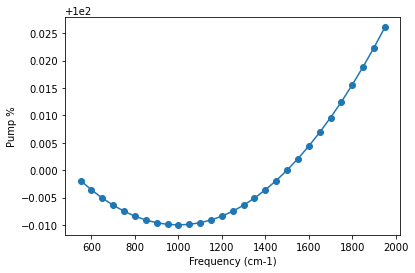

In [35]:
wns=np.arange(600,2000.,50)
print(len(wns))
pumpgen=alpha.pump_generator(wns=(500,1000),pump_vals=(100,99.99))
pumps = pumpgen(wns)
plt.plot(wns,pumps,marker='o')
plt.ylabel('Pump %')
plt.xlabel('Frequency (cm-1)')
print('Frequency step (cm-1):',np.diff(wns)[0])

In [27]:
 alpha.set_replicator_table(wns=wns,pumps=pumps)

ws://192.168.51.1:8000 connected!
Programming alpha replication entry i=0 of 30...
@mir setsignal 20000
@mir setpump 100.0
@rep save 0
Programming alpha replication entry i=1 of 30...
@mir setsignal 18182
@mir setpump 100.0
@rep save 1
Programming alpha replication entry i=2 of 30...
@mir setsignal 16667
@mir setpump 100.0
@rep save 2
Programming alpha replication entry i=3 of 30...
@mir setsignal 15385
@mir setpump 100.0
@rep save 3
Programming alpha replication entry i=4 of 30...
@mir setsignal 14286
@mir setpump 100.0
@rep save 4
Programming alpha replication entry i=5 of 30...
@mir setsignal 13333
@mir setpump 100.0
@rep save 5
Programming alpha replication entry i=6 of 30...
@mir setsignal 12500
@mir setpump 100.0
@rep save 6
Programming alpha replication entry i=7 of 30...
@mir setsignal 11765
@mir setpump 100.0
@rep save 7
Programming alpha replication entry i=8 of 30...
@mir setsignal 11111
@mir setpump 100.0
@rep save 8
Programming alpha replication entry i=9 of 30...
@mir set

In [29]:
ls "../Alpha replicator tables"

 Volume in drive C is OS
 Volume Serial Number is 621C-9904

 Directory of C:\Users\mnopl\Desktop\Software\mnOPSuite\PRISM\Alpha replicator tables

09/15/2022  04:28 PM    <DIR>          .
09/15/2022  04:28 PM    <DIR>          ..
07/12/2022  07:42 PM    <DIR>          .ipynb_checkpoints
06/12/2022  08:05 AM             5,920 2022.05.17_600-1800cm-1_x40.txt
06/20/2022  11:44 PM             2,917 2022.06.20_750-1550cm-1_x20.txt
06/21/2022  05:47 PM                 0 2022.06.21_600-850cm-1x11.txt
06/22/2022  10:57 PM             6,056 2022.06.22_600-2000cm-1_x40.txt
07/15/2022  12:18 AM             6,045 2022.07.11_600-2000cm-1_x40_RestoredPumps.txt
07/11/2022  10:46 PM             5,898 2022.07.11_600-2000cm-1_x40_UpdatedCollimation.txt
07/12/2022  08:12 PM             6,044 2022.07.11_600-2000cm-1_x40_UpdatedOptimizationAndLowerPumps.txt
08/15/2022  11:15 PM             2,952 2022.08.15_600-1300cm-1_x20_nanoFTIR.txt
08/11/2022  03:13 PM             6,198 2022.08.22_600-1500cm-1_x20_nan

In [76]:
dat=np.loadtxt('../Alpha replicator tables/2022.09.15 - 600-2000 cm-1_x30 nanoFTIR - collimation optimized.txt')

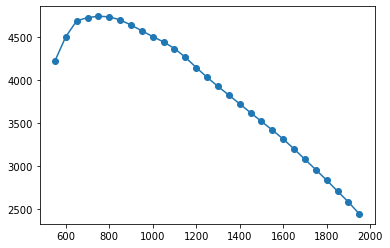

In [62]:
ax10s_initial=dat[:,-4]
plt.plot(wns,ax10s_initial,marker='o')

# Values obtained from manual collimation

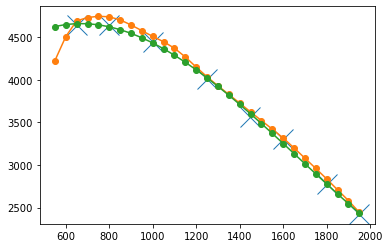

In [84]:
wls_ax10s=(15.385,
          12.5,
          10,
          8,
           6.9,
          6.25,
           5.556,
          5.128)
ax10s_optimized=(4645.75,
              4645.50,
               4442.50,
              4007.50,
                 3557.75,
                3306.25,
                 2773.75,
                2425)

wls_ax10s=np.array(wls_ax10s)*1000 # in nm
wns_ax10s = alpha.wl_to_wn(wls_ax10s)
ax10gen=np.polyfit(x=wns_ax10s,y=ax10s_optimized,
                            deg=3)
ax10s_new = np.polyval(ax10gen,wns)

plt.plot(wns_ax10s,ax10s_optimized,ls='',marker='x',markersize=20)
plt.plot(wns,ax10s_initial,marker='o')
plt.plot(wns,ax10s_new,marker='o')

## Record the optimized collimation values

In [85]:
dat[:,-4]=ax10s_new

In [86]:
np.savetxt('../Alpha replicator tables/2022.09.15 - 600-2000 cm-1_x30 nanoFTIR - collimation optimized.txt',
          dat)

In [80]:
ax10gen

array([ 8.72454194e-13, -6.59665667e-09,  1.98372545e-05, -3.01260697e-02,
        2.12813284e+01, -8.32554077e+02])

In [83]:
np.polyval(ax10gen,wns)

array([4499.73763624, 4588.62019806, 4643.5365743 , 4669.55608236,
       4671.18386259, 4652.39359525, 4616.66021763, 4566.99264101,
       4505.96646772, 4435.75670817, 4358.1704979 , 4274.67981459,
       4186.45419508, 4094.39345243, 3999.16039297, 3901.21353326,
       3800.8398172 , 3698.18733301, 3593.29803031, 3486.14043708,
       3376.64237677, 3264.7236853 , 3150.32892807, 3033.46011702,
       2914.20942768, 2792.79191614, 2669.57823614, 2545.12735608,
       2420.21927607])

In [88]:
print(dat[0])

[    0.          1964.78        1964.78       18182.
   830.          1445.         14000.            37.3783
    44.9977     14407.4        14382.9           26.8617
  7947.03       14586.9           44.9977       102.086
  9437.85        4626.64625698 16829.3        13000.
    37.8319    ]
